In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
from slugify import slugify

from eurosfordoctors import checks
from eurosfordoctors import utils

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

MONEY_FIELDS = utils.MONEY_FIELDS
MONEY_FIELDS_ONLY = utils.MONEY_FIELDS_ONLY

In [2]:
df = pd.read_csv('data/geocoded.csv', encoding='utf-8', converters={'postcode': str, 'uci': str})
df.head()

,index,address,base_country,clean_name,company,company_doc_id,country,currency,donations_grants,donations_grants_dirty,fees,fees_dirty,first_name,gender,last_name,location,name,origin,postcode,recipient_detail,registration_fees,registration_fees_dirty,related_expenses,related_expenses_dirty,sponsorship,sponsorship_dirty,title,total,total_dirty,travel_accommodation,travel_accommodation_dirty,type,uci,uid,year,computed_total,lat,lng,uid_original
0,0,al.Wojska Polskiego 30,PL,tomasz-aleksiejczyk,abbvie,NaN,PL,NaN,NaN,NaN,NaN,NaN,Tomasz,NaN,Aleksiejczyk,Olsztyn,Tomasz Aleksiejczyk,PL,11-041,NaN,2600.0,2600.0,NaN,NaN,NaN,NaN,NaN,2600.0,2600.0,NaN,NaN,hcp,,659935bb-7b00-4bba-9be2-22a36b764ace,2015,2600.0,53.798334,20.483035,659935bb-7b00-4bba-9be2-22a36b764ace
1,1,ul.Szpitalna 27/33,PL,alicja-bartkowska-sniatkowska,abbvie,NaN,PL,NaN,NaN,NaN,1687.0,1687.0,Alicja,NaN,Bartkowska-Śniatkowska,Poznań,Alicja Bartkowska-Śniatkowska,PL,,NaN,NaN,NaN,162.0,162.0,NaN,NaN,NaN,1849.0,1849.0,NaN,NaN,hcp,,72da1abc-64bf-4750-b09b-bd1d6db01625,2015,1849.0,52.411926,16.877796,72da1abc-64bf-4750-b09b-bd1d6db01625
2,2,ul.Roentgena 5,PL,witold-bartnik,abbvie,NaN,PL,NaN,NaN,NaN,4030.0,4030.0,Witold,NaN,Bartnik,Warszawa,Witold Bartnik,PL,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4030.0,4030.0,NaN,NaN,hcp,,d0af9ef0-d840-40f2-a2b3-076993d5fe58,2015,4030.0,52.147588,21.031902,d0af9ef0-d840-40f2-a2b3-076993d5fe58
3,3,ul.Zjednoczenia 10,PL,marek-beniowski,abbvie,NaN,PL,NaN,NaN,NaN,1200.0,1200.0,Marek,NaN,Beniowski,Chorzów,Marek Beniowski,PL,41,NaN,2555.0,2555.0,NaN,NaN,NaN,NaN,NaN,13272.0,13272.0,9517.0,9517.0,hcp,,0435e01e-af47-4c69-b29c-f917cc012285,2015,13272.0,50.292210,18.952988,0435e01e-af47-4c69-b29c-f917cc012285
4,4,ul. 3 Maja 13/15,PL,szymon-bialka,abbvie,NaN,PL,NaN,NaN,NaN,NaN,NaN,Szymon,NaN,Białka,Zabrze,Szymon Białka,PL,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.0,154.0,154.0,154.0,hcp,,e090df0e-5669-435e-bd15-5a1ae474fbad,2015,154.0,50.302056,18.785812,e090df0e-5669-435e-bd15-5a1ae474fbad


In [3]:
df.dtypes

index                           int64
address                        object
base_country                   object
clean_name                     object
company                        object
company_doc_id                 object
country                        object
currency                       object
donations_grants              float64
donations_grants_dirty        float64
fees                          float64
fees_dirty                    float64
first_name                     object
gender                        float64
last_name                      object
location                       object
name                           object
origin                         object
postcode                       object
recipient_detail               object
registration_fees             float64
registration_fees_dirty       float64
related_expenses              float64
related_expenses_dirty        float64
sponsorship                   float64
sponsorship_dirty             float64
title       

In [4]:
dirty_total = checks.check_computed_total(df)
dirty_total.head()

,company,index,name,address,total,total_dirty,computed_total,travel_accommodation,donations_grants,related_expenses,registration_fees,fees,sponsorship


In [5]:
agg_df = pd.read_csv('./data/pl/aggregated.csv')
agg_df['country'] = 'PL'
agg_df = agg_df.rename(columns={'slug': 'company'})
agg_df['year'] = 2015
agg_df.head(15)

,company,year,type,label,count,amount,percent,country
0,abbvie,2015,hcp,registration_fees,757,1077571.00,96.00,PL
1,abbvie,2015,hcp,travel_accommodation,891,2323174.00,94.00,PL
2,abbvie,2015,hcp,fees,321,956372.00,93.00,PL
3,abbvie,2015,hcp,related_expenses,42,68248.00,95.00,PL
4,abbvie,2015,hco,donations_grants,0,0.00,0.00,PL
5,abbvie,2015,hco,sponsorship,2,893770.00,6.00,PL
6,abbvie,2015,hco,registration_fees,0,0.00,0.00,PL
7,abbvie,2015,hco,travel_accommodation,0,0.00,0.00,PL
8,abbvie,2015,hco,fees,0,0.00,0.00,PL
9,abbvie,2015,hco,related_expenses,0,0.00,0.00,PL


In [6]:
agg_df[(agg_df['percent'] < 1) & (agg_df['percent'] > 0)]

,company,year,type,label,count,amount,percent,country


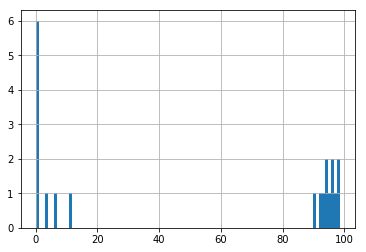

In [7]:
agg_df['percent'].hist(bins=100)

In [8]:
melted_df = pd.melt(df, id_vars=['company', 'index', 'type', 'year'], value_vars=MONEY_FIELDS_ONLY, var_name='label', value_name='amount')
melted_df = melted_df[melted_df['amount'].notnull() & melted_df['amount'] > 0]
melted_df.head()

,company,index,type,year,label,amount
3,abbvie,3,hcp,2015,travel_accommodation,9517.0
4,abbvie,4,hcp,2015,travel_accommodation,154.0
5,abbvie,5,hcp,2015,travel_accommodation,258.0
8,abbvie,8,hcp,2015,travel_accommodation,492.0
9,abbvie,9,hcp,2015,travel_accommodation,9140.0


In [9]:
counted = melted_df[melted_df['year'] == 2015].groupby(['company', 'label', 'type']).size().reset_index()
counted = counted.rename(columns={0: 'individual_count'})
counted.head()

,company,label,type,individual_count
0,abbvie,donations_grants,hco,38
1,abbvie,fees,hco,1
2,abbvie,fees,hcp,26
3,abbvie,registration_fees,hcp,33
4,abbvie,related_expenses,hcp,2


In [10]:
merged_df = agg_df.merge(counted, on=['company', 'label', 'type'], how='left')
merged_df.head()

,company,year,type,label,count,amount,percent,country,individual_count
0,abbvie,2015,hcp,registration_fees,757,1077571.0,96.0,PL,33.0
1,abbvie,2015,hcp,travel_accommodation,891,2323174.0,94.0,PL,52.0
2,abbvie,2015,hcp,fees,321,956372.0,93.0,PL,26.0
3,abbvie,2015,hcp,related_expenses,42,68248.0,95.0,PL,2.0
4,abbvie,2015,hco,donations_grants,0,0.0,0.0,PL,38.0


In [11]:
merged_df['total_count'] = merged_df['count'] + merged_df['individual_count']
merged_df['should_ind_count'] = merged_df['count'] / (merged_df['percent'] / 100) * ((100 - merged_df['percent']) / 100)
merged_df['diff_count'] = merged_df['should_ind_count'] - merged_df['individual_count']
merged_df['calc_percent'] = merged_df['count'] / merged_df['total_count'] * 100
merged_df.head()

,company,year,type,label,count,amount,percent,country,individual_count,total_count,should_ind_count,diff_count,calc_percent
0,abbvie,2015,hcp,registration_fees,757,1077571.0,96.0,PL,33.0,790.0,31.541667,-1.458333,95.822785
1,abbvie,2015,hcp,travel_accommodation,891,2323174.0,94.0,PL,52.0,943.0,56.872340,4.872340,94.485684
2,abbvie,2015,hcp,fees,321,956372.0,93.0,PL,26.0,347.0,24.161290,-1.838710,92.507205
3,abbvie,2015,hcp,related_expenses,42,68248.0,95.0,PL,2.0,44.0,2.210526,0.210526,95.454545
4,abbvie,2015,hco,donations_grants,0,0.0,0.0,PL,38.0,38.0,NaN,NaN,0.000000


In [12]:
c = ['company', 'type', 'label', 'count', 'individual_count', 'should_ind_count', 'percent', 'calc_percent', 'diff_count']
missing = merged_df[~np.isclose(merged_df['percent'], merged_df['calc_percent'], atol=0.5) &
                    (merged_df['total_count'] > 0)][c].sort_values('diff_count', ascending=False)
missing.to_csv('data/pl_bad_percentage.csv')
print(len(missing))
missing.head()

0


,company,type,label,count,individual_count,should_ind_count,percent,calc_percent,diff_count
